Packaging anomaly Detection
The methods or techniques is used in the analysis is may or may not good or bad but I used whatever the methods I know I have applied it to these analysis.

In [1]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading train data
train_data=pd.read_csv("C:/Users/DELL/Desktop/ml/Train_mask.csv")
train_data.head(5)

,timeindex,flag,currentBack,motorTempBack,positionBack,refPositionBack,refVelocityBack,trackingDeviationBack,velocityBack,currentFront,motorTempFront,positionFront,refPositionFront,refVelocityFront,trackingDeviationFront,velocityFront
0,1,1,30.0,46,576.499377,581.499997,7.000000,7.000623,10.000000,16.0,46,970.499907,971.499997,10.000000,8.000125,5.000000
1,2,1,101.0,42,576.499211,576.499999,9.000000,8.000747,7.000000,66.0,42,969.499450,969.499999,5.000000,10.000540,10.000000
2,3,1,815.0,41,355.576792,363.368778,584.045836,4.994664,587.020659,726.0,38,741.523412,742.361361,590.807348,4.987812,593.415386
3,4,1,219.0,40,577.499585,578.499998,7.000000,6.000332,8.041526,207.0,39,972.499575,971.499998,5.000000,7.000457,6.031144
4,5,1,76.0,40,4.998796,9.000000,6.000000,7.001246,6.000000,-13.0,43,398.999076,398.000000,6.000000,5.000914,8.000000


In [3]:
#loading test data
test_data=pd.read_csv("C:/Users/DELL/Desktop/ml/Test_Mask_Dataset.csv")
test_data.head()

,timeindex,currentBack,motorTempBack,positionBack,refPositionBack,refVelocityBack,trackingDeviationBack,velocityBack,currentFront,motorTempFront,positionFront,refPositionFront,refVelocityFront,trackingDeviationFront,velocityFront
0,1,-37.5,43,6.999564,5.000000,8.0,10.000478,4.979237,0.0,42,401.000987,399.000000,8.0,4.999003,7.979237
1,2,-11.5,47,580.499086,581.499997,6.0,9.000914,6.000000,25.0,44,973.498993,972.499997,6.0,7.000997,8.000000
2,3,68.0,44,576.500041,579.499998,10.0,9.999917,6.031144,142.0,49,971.499450,970.499998,7.0,8.000498,9.000000
3,4,136.0,44,579.499709,580.499998,5.0,8.000291,6.979237,137.0,48,970.499616,969.499998,7.0,6.000374,9.000000
4,5,66.0,47,579.499709,580.499998,5.0,5.000291,7.000000,123.0,44,971.499450,971.499998,5.0,9.000540,8.000000


In [176]:
test=test_data[['currentBack', 'motorTempBack', 'positionBack',
       'refPositionBack', 'refVelocityBack', 'trackingDeviationBack',
       'velocityBack', 'currentFront', 'motorTempFront', 'positionFront',
       'refPositionFront', 'refVelocityFront', 'trackingDeviationFront',
       'velocityFront']]

In [4]:
#data types in train data
train_data.dtypes

timeindex                   int64
flag                        int64
currentBack               float64
motorTempBack               int64
positionBack              float64
refPositionBack           float64
refVelocityBack           float64
trackingDeviationBack     float64
velocityBack              float64
currentFront              float64
motorTempFront              int64
positionFront             float64
refPositionFront          float64
refVelocityFront          float64
trackingDeviationFront    float64
velocityFront             float64
dtype: object

In [5]:
#train data size
train_data.shape

(11227, 16)

In [6]:
#test data size
test_data.shape

(2505, 15)

In [7]:
#information about train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11227 entries, 0 to 11226
Data columns (total 16 columns):
timeindex                 11227 non-null int64
flag                      11227 non-null int64
currentBack               11227 non-null float64
motorTempBack             11227 non-null int64
positionBack              11227 non-null float64
refPositionBack           11227 non-null float64
refVelocityBack           11227 non-null float64
trackingDeviationBack     11227 non-null float64
velocityBack              11227 non-null float64
currentFront              11227 non-null float64
motorTempFront            11227 non-null int64
positionFront             11227 non-null float64
refPositionFront          11227 non-null float64
refVelocityFront          11227 non-null float64
trackingDeviationFront    11227 non-null float64
velocityFront             11227 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.4 MB


In [8]:
#train columns
train_data.columns

Index(['timeindex', 'flag', 'currentBack', 'motorTempBack', 'positionBack',
       'refPositionBack', 'refVelocityBack', 'trackingDeviationBack',
       'velocityBack', 'currentFront', 'motorTempFront', 'positionFront',
       'refPositionFront', 'refVelocityFront', 'trackingDeviationFront',
       'velocityFront'],
      dtype='object')

In [212]:
x=train_data[[ 'currentBack', 'motorTempBack', 'positionBack',
       'refPositionBack', 'refVelocityBack', 'trackingDeviationBack',
       'velocityBack', 'currentFront', 'motorTempFront', 'positionFront',
       'refPositionFront', 'refVelocityFront', 'trackingDeviationFront',
       'velocityFront']]
y=train_data[['flag']]

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [213]:
y


,flag
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [170]:
x

,currentBack,motorTempBack,positionBack,refPositionBack,refVelocityBack,trackingDeviationBack,velocityBack,currentFront,motorTempFront,positionFront,refPositionFront,refVelocityFront,trackingDeviationFront,velocityFront
0,30.0,46,576.499377,581.499997,7.000000,7.000623,10.000000,16.0,46,970.499907,971.499997,10.000000,8.000125,5.000000
1,101.0,42,576.499211,576.499999,9.000000,8.000747,7.000000,66.0,42,969.499450,969.499999,5.000000,10.000540,10.000000
2,815.0,41,355.576792,363.368778,584.045836,4.994664,587.020659,726.0,38,741.523412,742.361361,590.807348,4.987812,593.415386
3,219.0,40,577.499585,578.499998,7.000000,6.000332,8.041526,207.0,39,972.499575,971.499998,5.000000,7.000457,6.031144
4,76.0,40,4.998796,9.000000,6.000000,7.001246,6.000000,-13.0,43,398.999076,398.000000,6.000000,5.000914,8.000000
5,49.0,39,577.499585,581.499999,7.000000,6.000415,8.000000,217.0,44,972.498910,973.499999,9.000000,8.001121,9.000000
6,79.0,42,579.500041,577.499998,6.000000,5.000000,8.000000,246.5,45,969.501817,970.499998,10.000000,6.998214,8.000000
7,66.0,36,9.000000,8.000000,7.000000,10.000000,9.020763,457.5,38,398.002336,398.000000,5.000000,7.997695,10.000000
8,7.0,36,578.499585,577.499998,10.000000,7.000415,7.000000,53.0,40,969.499118,971.499998,9.000000,5.000914,10.000000
9,109.0,42,580.499585,578.499999,6.000000,9.000415,7.000000,132.5,41,970.499658,973.499999,5.000000,8.000332,8.000000


In [9]:
#statistical description
train_data.describe()

,timeindex,flag,currentBack,motorTempBack,positionBack,refPositionBack,refVelocityBack,trackingDeviationBack,velocityBack,currentFront,motorTempFront,positionFront,refPositionFront,refVelocityFront,trackingDeviationFront,velocityFront
count,11227.00000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000,11227.000000
mean,5614.00000,0.396455,86.208159,41.389686,454.818115,455.457622,74.391243,7.509257,74.349871,175.678543,42.569698,845.152363,845.770184,74.485635,7.492794,74.490320
std,3241.10007,0.489183,184.142004,3.494035,217.860048,217.627546,177.001734,1.713630,177.036037,228.341186,3.608419,218.227800,217.983051,177.537284,1.709240,177.480053
min,1.00000,0.000000,-81.500000,30.000000,4.998650,5.000000,5.000000,4.979985,4.958474,-87.000000,30.000000,396.998371,397.000000,5.000000,4.974877,4.958474
25%,2807.50000,0.000000,-17.000000,39.000000,384.935546,389.770291,6.000000,6.000000,6.000000,36.000000,41.000000,767.922539,772.726670,6.000000,6.000415,6.000000
50%,5614.00000,0.000000,12.000000,42.000000,577.499959,577.499998,8.000000,7.001204,8.000000,98.000000,43.000000,969.499658,969.499998,8.000000,7.978946,8.000000
75%,8420.50000,1.000000,90.000000,44.000000,579.500000,579.499999,10.000000,9.000000,10.000000,191.000000,45.000000,971.499948,971.499999,10.000000,9.000394,10.000000
max,11227.00000,1.000000,2408.500000,47.000000,581.502616,581.499999,1176.261126,10.001661,1123.643342,1113.000000,49.000000,973.517597,973.499999,642.625119,10.006727,653.070908


In [10]:
#finding null values
train_data.isnull().sum()

timeindex                 0
flag                      0
currentBack               0
motorTempBack             0
positionBack              0
refPositionBack           0
refVelocityBack           0
trackingDeviationBack     0
velocityBack              0
currentFront              0
motorTempFront            0
positionFront             0
refPositionFront          0
refVelocityFront          0
trackingDeviationFront    0
velocityFront             0
dtype: int64

In [11]:
#finding missing percentage
missing=pd.DataFrame({'total':train_data.isnull().sum(),'percentage':(train_data.isnull().sum()/11227)*100})
missing

,total,percentage
timeindex,0,0.0
flag,0,0.0
currentBack,0,0.0
motorTempBack,0,0.0
positionBack,0,0.0
refPositionBack,0,0.0
refVelocityBack,0,0.0
trackingDeviationBack,0,0.0
velocityBack,0,0.0
currentFront,0,0.0


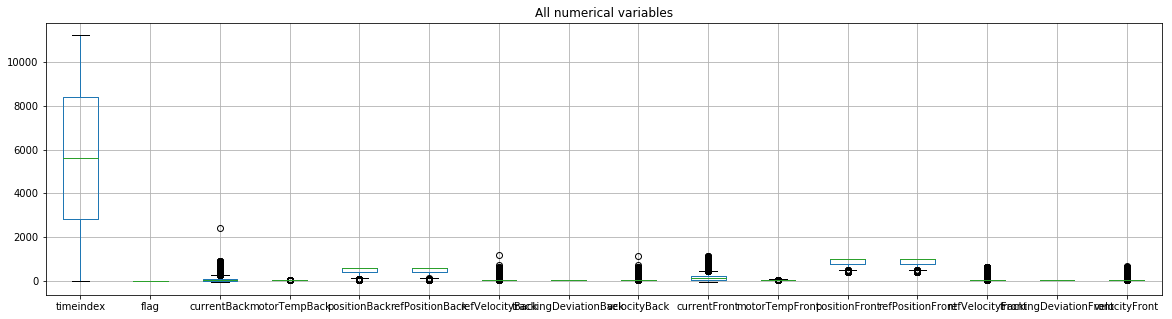

In [12]:
#plotting a boxplot for outlier detection
columns=train_data.columns
plt.figure(figsize=(20,5))
train_data[columns].boxplot()
plt.title("All numerical variables")
plt.show()

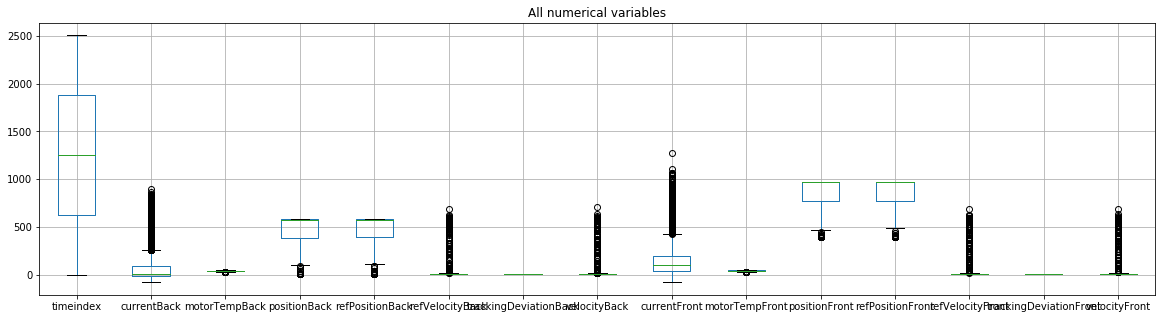

In [85]:
columns=test_data.columns
plt.figure(figsize=(20,5))
test_data[columns].boxplot()
plt.title("All numerical variables")
plt.show()

In [108]:
train_data.corr()

,timeindex,flag,currentBack,motorTempBack,positionBack,refPositionBack,refVelocityBack,trackingDeviationBack,velocityBack,currentFront,motorTempFront,positionFront,refPositionFront,refVelocityFront,trackingDeviationFront,velocityFront
timeindex,1.000000,0.022282,-0.010226,-0.010710,0.007336,0.007130,-0.010866,0.011330,-0.009979,-0.013213,-0.013791,0.007712,0.007809,-0.009861,-0.003305,-0.009336
flag,0.022282,1.000000,0.202685,0.168416,-0.000239,-0.000459,-0.004356,-0.004209,-0.004248,0.108213,0.177750,-0.000443,-0.000313,-0.003983,-0.004668,-0.004033
currentBack,-0.010226,0.202685,1.000000,0.035500,-0.098914,-0.092492,0.889065,-0.015136,0.891728,0.806388,0.037823,-0.108339,-0.101729,0.884273,0.003923,0.885740
motorTempBack,-0.010710,0.168416,0.035500,1.000000,0.010617,0.010382,-0.010398,-0.002603,-0.010081,0.018959,0.728635,0.010702,0.010543,-0.010953,0.005458,-0.010883
positionBack,0.007336,-0.000239,-0.098914,0.010617,1.000000,0.999910,-0.110415,0.007072,-0.105944,-0.084704,0.004003,0.998612,0.998691,-0.109786,-0.012503,-0.105758
refPositionBack,0.007130,-0.000459,-0.092492,0.010382,0.999910,1.000000,-0.103161,0.006994,-0.098709,-0.078914,0.003809,0.998496,0.998633,-0.102573,-0.012475,-0.098567
refVelocityBack,-0.010866,-0.004356,0.889065,-0.010398,-0.110415,-0.103161,1.000000,-0.012670,0.998880,0.796988,-0.007708,-0.120911,-0.113585,0.996027,-0.000086,0.995218
trackingDeviationBack,0.011330,-0.004209,-0.015136,-0.002603,0.007072,0.006994,-0.012670,1.000000,-0.013281,-0.005444,-0.011091,0.006946,0.006940,-0.012744,-0.006239,-0.013056
velocityBack,-0.009979,-0.004248,0.891728,-0.010081,-0.105944,-0.098709,0.998880,-0.013281,1.000000,0.801482,-0.007485,-0.116535,-0.109231,0.995288,-0.000101,0.996144
currentFront,-0.013213,0.108213,0.806388,0.018959,-0.084704,-0.078914,0.796988,-0.005444,0.801482,1.000000,0.019457,-0.096605,-0.090653,0.800268,0.014896,0.803208


In [107]:
test_data.corr()

,timeindex,currentBack,motorTempBack,positionBack,refPositionBack,refVelocityBack,trackingDeviationBack,velocityBack,currentFront,motorTempFront,positionFront,refPositionFront,refVelocityFront,trackingDeviationFront,velocityFront
timeindex,1.000000,-0.041726,-0.023767,-0.001948,-0.002321,-0.042741,0.029380,-0.042207,-0.028721,-0.016339,-0.000443,-0.000992,-0.042628,-0.017921,-0.041726
currentBack,-0.041726,1.000000,0.059511,-0.104308,-0.098055,0.892569,-0.003311,0.895531,0.831503,0.073934,-0.117460,-0.110539,0.893288,-0.023637,0.894441
motorTempBack,-0.023767,0.059511,1.000000,-0.014579,-0.015000,0.014644,-0.010251,0.014381,0.038847,0.752492,-0.013971,-0.013596,0.014670,-0.005846,0.014278
positionBack,-0.001948,-0.104308,-0.014579,1.000000,0.999908,-0.116224,0.016265,-0.112314,-0.085904,-0.020634,0.997536,0.997647,-0.115990,-0.030405,-0.112379
refPositionBack,-0.002321,-0.098055,-0.015000,0.999908,1.000000,-0.108965,0.016338,-0.105074,-0.080214,-0.020992,0.997388,0.997561,-0.108744,-0.030271,-0.105145
refVelocityBack,-0.042741,0.892569,0.014644,-0.116224,-0.108965,1.000000,-0.003029,0.998927,0.813523,0.012479,-0.129504,-0.121907,0.999525,-0.012191,0.998715
trackingDeviationBack,0.029380,-0.003311,-0.010251,0.016265,0.016338,-0.003029,1.000000,-0.003866,0.006438,-0.006526,0.016680,0.016612,-0.002837,0.013448,-0.004070
velocityBack,-0.042207,0.895531,0.014381,-0.112314,-0.105074,0.998927,-0.003866,1.000000,0.817913,0.012781,-0.125541,-0.117948,0.998827,-0.011565,0.999488
currentFront,-0.028721,0.831503,0.038847,-0.085904,-0.080214,0.813523,0.006438,0.817913,1.000000,0.049750,-0.098079,-0.091607,0.814685,-0.028461,0.817382
motorTempFront,-0.016339,0.073934,0.752492,-0.020634,-0.020992,0.012479,-0.006526,0.012781,0.049750,1.000000,-0.021077,-0.020661,0.012604,0.012116,0.012908


In [13]:
#finding total null values
train_data.isnull().sum().sum()

0

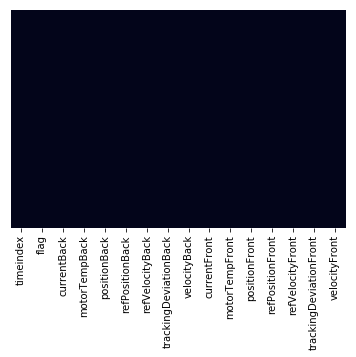

In [14]:
#plotting heatmap to chech any missing values
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [15]:
feature=train_data.select_dtypes(include=[np.number])

feature.dtypes

timeindex                   int64
flag                        int64
currentBack               float64
motorTempBack               int64
positionBack              float64
refPositionBack           float64
refVelocityBack           float64
trackingDeviationBack     float64
velocityBack              float64
currentFront              float64
motorTempFront              int64
positionFront             float64
refPositionFront          float64
refVelocityFront          float64
trackingDeviationFront    float64
velocityFront             float64
dtype: object

In [16]:
# correlation is
correlation=feature.corr()
print(correlation['flag'].sort_values(ascending=False)[:5], '\n')
print(correlation['flag'].sort_values(ascending=False)[-5:])

flag              1.000000
currentBack       0.202685
motorTempFront    0.177750
motorTempBack     0.168416
currentFront      0.108213
Name: flag, dtype: float64 

velocityFront            -0.004033
trackingDeviationBack    -0.004209
velocityBack             -0.004248
refVelocityBack          -0.004356
trackingDeviationFront   -0.004668
Name: flag, dtype: float64


In [17]:
#finding null values in test data
test_data.isnull().sum()

timeindex                 0
currentBack               0
motorTempBack             0
positionBack              0
refPositionBack           0
refVelocityBack           0
trackingDeviationBack     0
velocityBack              0
currentFront              0
motorTempFront            0
positionFront             0
refPositionFront          0
refVelocityFront          0
trackingDeviationFront    0
velocityFront             0
dtype: int64

In [18]:
#extracting a dependent variable
train_data["flag"]

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       1
28       1
29       1
        ..
11197    1
11198    1
11199    1
11200    1
11201    1
11202    1
11203    1
11204    1
11205    1
11206    1
11207    1
11208    1
11209    1
11210    1
11211    1
11212    1
11213    1
11214    1
11215    1
11216    1
11217    0
11218    0
11219    0
11220    0
11221    0
11222    0
11223    0
11224    0
11225    0
11226    1
Name: flag, Length: 11227, dtype: int64

In [19]:
# y=train_data.iloc[:,1]
# #y
# x=train_data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
#x

In [20]:
# print(x)

In [21]:
# print(y)

In [4]:
train_x=train_data.drop(columns=['flag'],axis=1)
train_y=train_data["flag"]

In [5]:
train_x.shape, train_y.shape

((11227, 15), (11227,))

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2231,random_state=1)

In [8]:
x_train.shape, x_test.shape ,y_train.shape,y_test.shape

((8722, 15), (2505, 15), (8722,), (2505,))

In [11]:
classifier=KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [12]:
pred=classifier.predict(x_test)
print(pred)

[0 0 1 ... 0 1 0]


In [13]:
#x_test
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [14]:
result=classification_report(y_test,pred)
print("Report is:",result)


Report is:               precision    recall  f1-score   support

           0       0.75      0.95      0.84      1530
           1       0.86      0.50      0.63       975

   micro avg       0.77      0.77      0.77      2505
   macro avg       0.81      0.73      0.74      2505
weighted avg       0.79      0.77      0.76      2505



In [15]:
result=confusion_matrix(y_test,pred)
print("confusion matrix is",result)
result1=classification_report(y_test,pred)
print("report is",result1)
result2=accuracy_score(y_test,pred)
print("accuracy:", result2)

confusion matrix is [[1453   77]
 [ 487  488]]
report is               precision    recall  f1-score   support

           0       0.75      0.95      0.84      1530
           1       0.86      0.50      0.63       975

   micro avg       0.77      0.77      0.77      2505
   macro avg       0.81      0.73      0.74      2505
weighted avg       0.79      0.77      0.76      2505

accuracy: 0.7748502994011977


In [16]:
acc=accuracy_score(y_test,pred)
print("accuracy:",acc)

accuracy: 0.7748502994011977


In [17]:
sc=f1_score(y_test,pred)
print("F1_score:",sc)

F1_score: 0.6337662337662338


In [18]:
y_test.shape

(2505,)

In [19]:
pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [20]:
data=pd.DataFrame(pred,columns=["flag"])
data.head()

,flag
0,0
1,0
2,1
3,1
4,0


In [21]:
pred2=classifier.predict(test_data)

In [22]:
print("Report is:",classification_report(y_test,pred2))

Report is:               precision    recall  f1-score   support

           0       0.62      0.80      0.70      1530
           1       0.42      0.22      0.29       975

   micro avg       0.58      0.58      0.58      2505
   macro avg       0.52      0.51      0.49      2505
weighted avg       0.54      0.58      0.54      2505



In [23]:
data2=pd.DataFrame(pred2,columns=['flag'])
data2.head()

,flag
0,0
1,1
2,1
3,1
4,0


In [139]:
# data2.to_csv("C:/Users/DELL/Desktop/IMAGES/submission1.csv",header=['flag'])

In [140]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [141]:
classifier.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
rpr=classifier.predict(x_test)
print(rpr)

[0 0 0 ... 0 0 0]


In [60]:
print("accuracy:",accuracy_score(y_test,rpr))

accuracy: 0.7696606786427146


In [61]:
rpr1=classifier.predict(test_data)

In [62]:
rpr1

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
# #outlier detection
# train_data['currentBack'].max()

In [142]:
sample=pd.read_csv("C:/Users/DELL/Desktop/ml/Sample Submission.csv")
sample.head()

,Sl.No,flag
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [103]:
# sample["predict"]=data2
# sample.head()

In [104]:
# sample.to_csv("C:/Users/DELL/Desktop/IMAGES/final.csv")

In [209]:
submission=pd.DataFrame({
    'Sl.No':sample['Sl.No'],
    'flag':pred
})

submission.to_csv("C:/Users/DELL/Desktop/ml/final13.csv",index=False)

In [210]:
submission.head()

,Sl.No,flag
0,1,0
1,2,0
2,3,1
3,4,1
4,5,0


In [ ]:
from sklearn.svm import SVC

In [ ]:
# classifier=SVC(kernel='linear',random_state=0)
# classifier.fit(x_train,y_train)

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

In [35]:
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
pr=classifier.predict(x_test)

In [38]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73      1530
           1       0.53      0.28      0.37       975

   micro avg       0.62      0.62      0.62      2505
   macro avg       0.59      0.56      0.55      2505
weighted avg       0.60      0.62      0.59      2505



In [40]:
print(accuracy_score(y_test,pr))

0.624750499001996


In [171]:
from sklearn.model_selection import train_test_split

In [172]:
d_train,d_test,n_train,n_test=train_test_split(x,y,test_size=0.2231,random_state=1)

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
classi=DecisionTreeClassifier()
classi.fit(d_train,n_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [174]:
classi.predict(d_test)

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [178]:
pr=classi.predict(test)
pr

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)